# K-Means

## Import Library

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.
import cv2
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

## K-Means Starter

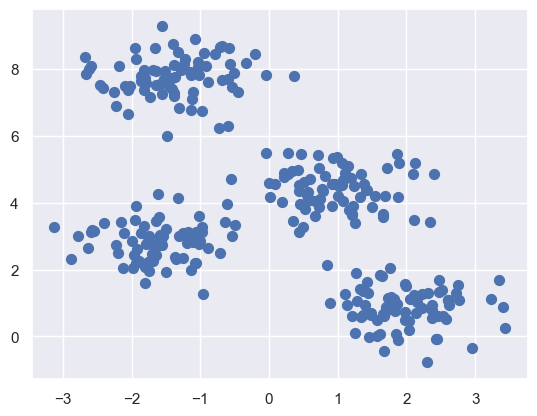

In [2]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

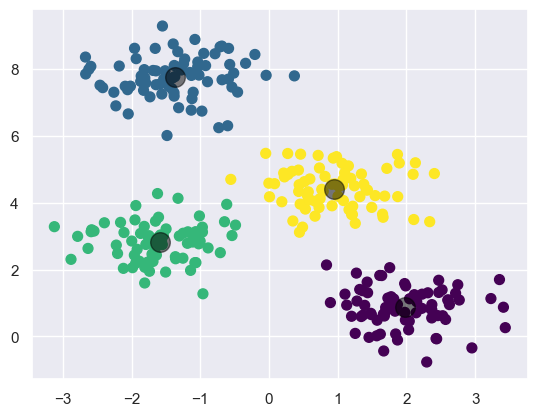

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## Algoritma Expectation-Maximization

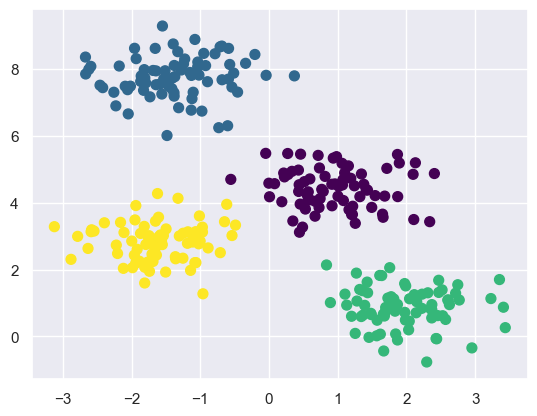

In [5]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

### Perubahan random

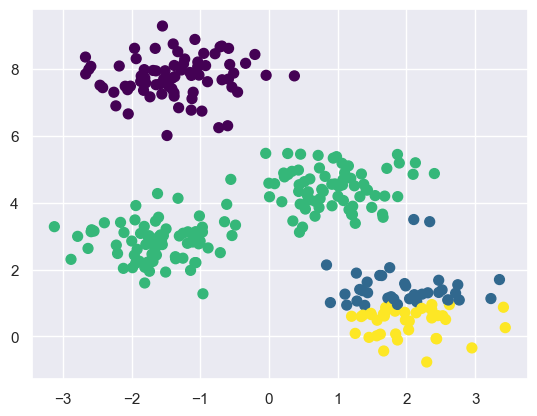

In [6]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

### Optimalisasi Jumlah Klaster

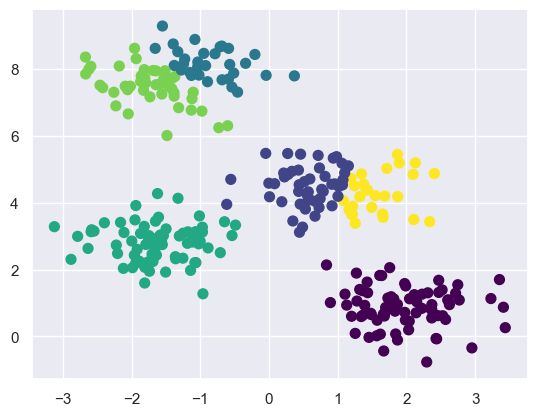

In [7]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

### Batas Klaster yang Tidak Selalu Linier

In [8]:
X, y = make_moons(200, noise=.05, random_state=0)

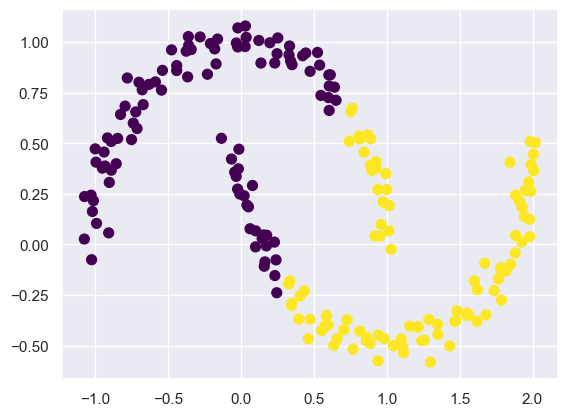

In [9]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

c:\Users\revid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


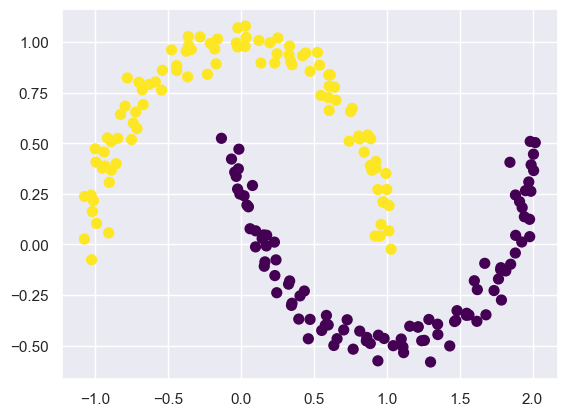

In [10]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

## Kompresi Citra

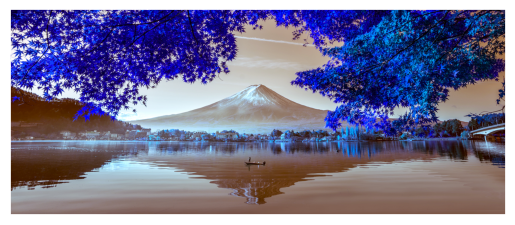

In [48]:
Landscape = cv2.imread('Landscape-Color.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(Landscape);

In [49]:
Landscape.shape

(664, 1601, 3)

In [50]:
data = Landscape / 255.0
data = data.reshape(1601 * 664, 3)
data.shape

(1063064, 3)

In [51]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

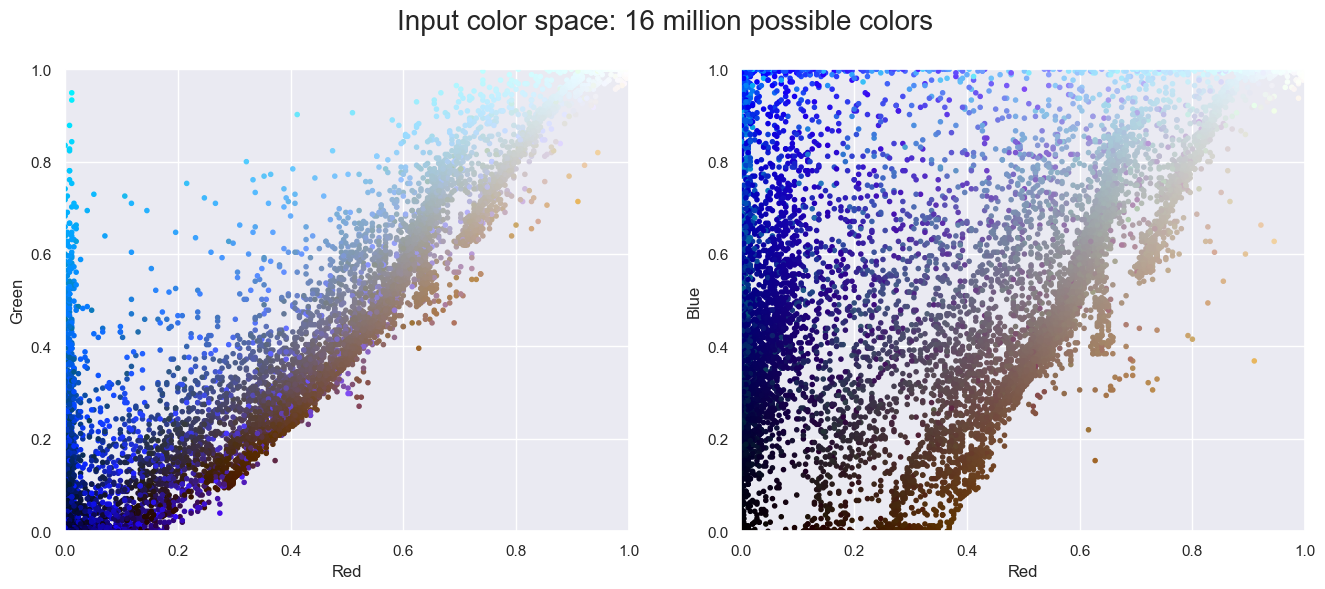

In [52]:
plot_pixels(data, title='Input color space: 16 million possible colors')

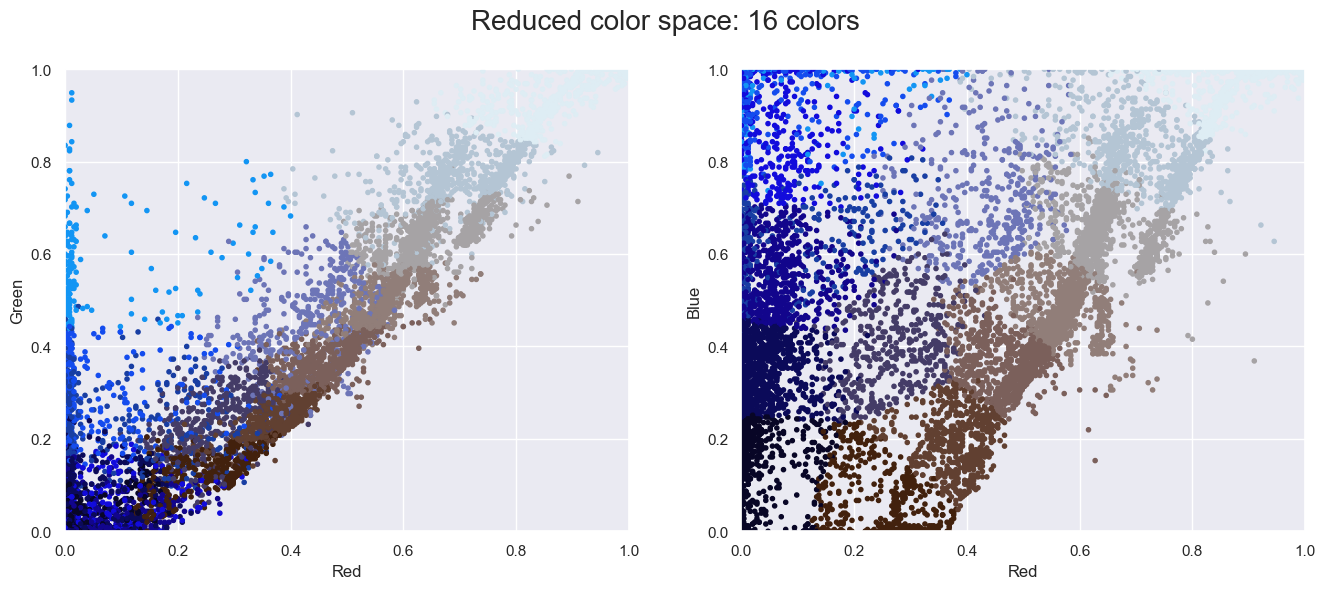

In [53]:
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

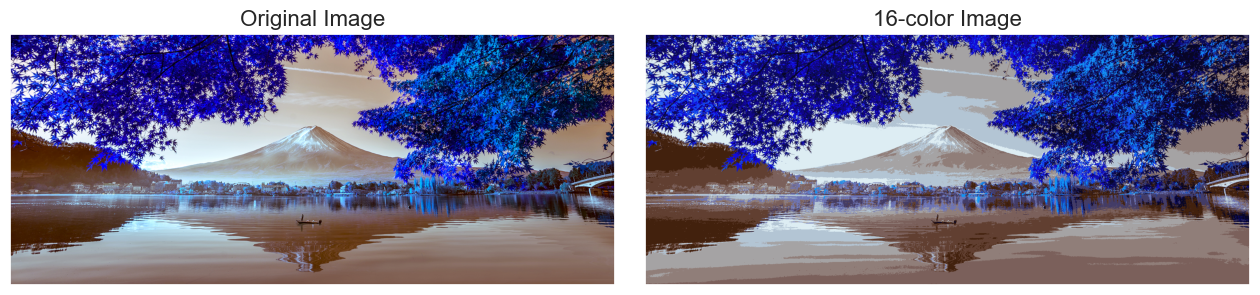

In [54]:
Landscape_recolored = new_colors.reshape(Landscape.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(Landscape)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(Landscape_recolored)
ax[1].set_title('16-color Image', size=16);

## WSS

In [55]:
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
   
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

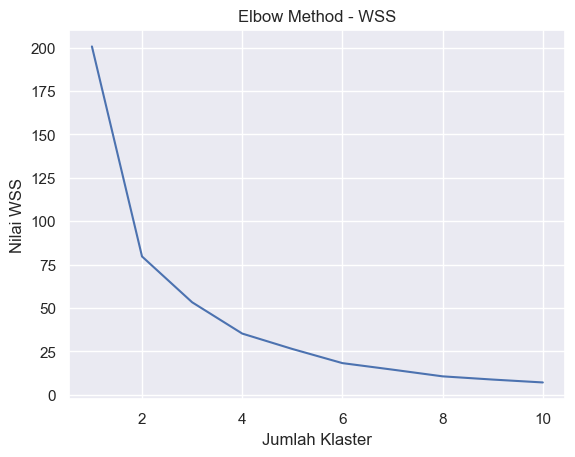

In [56]:
ycall = [1,2,3,4,5,6,7,8,9,10]

yWSS = calculate_WSS(X, 10)

plt.plot(ycall, yWSS)
plt.title('Elbow Method - WSS')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Nilai WSS')
plt.show()

## Silhouette

In [57]:
sil = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

sil

[0.49215648268306905,
 0.42336979347760667,
 0.44709257821561577,
 0.48268880990560786,
 0.4976793693950677,
 0.5175678111070667,
 0.5299228628714374,
 0.5259923649987153,
 0.5144705089089504]

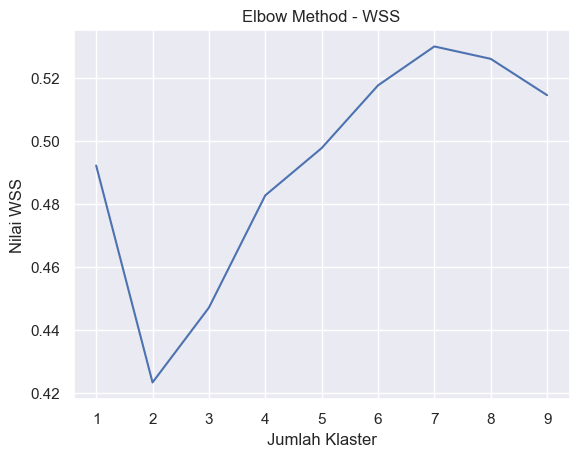

In [58]:
xsil = [1,2,3,4,5,6,7,8,9]

plt.plot(xsil, sil)
plt.title('Elbow Method - WSS')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Nilai WSS')
plt.show()